In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Dataset MNIST

El dataset **MNIST** consiste en imágenes de números manuscritos entre 0 y 9. Las imágenes tienen dimensiones de 28x28 pixeles y cada pixel está representado por un valor de intensidad en escala de grises. El conjunto de entrenamiento consiste en 60000 dígitos y el conjunto de prueba de 10000.

### Implemente una CNN para obtener un desempeño de al menos 99% en el conjunto de prueba

In [2]:
fashion_mnist =tf.keras.datasets.mnist.load_data()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Cargar el dataset MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

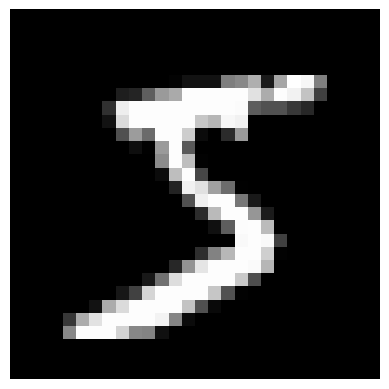

In [11]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
plot_image(train_images[0])

In [4]:
# Preprocesamiento de datos
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Definir la arquitectura de la CNN
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
# Compilar el modelo
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Entrenar el modelo
history = cnn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 41s 20ms/step - loss: 0.1374 - accuracy: 0.9571 - val_loss: 0.0529 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0444 - accuracy: 0.9868 - val_loss: 0.0290 - val_accuracy: 0.9908
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0373 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0306 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0291 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0453 -

In [9]:
# Evaluar el rendimiento en el conjunto de prueba
test_loss, test_acc = cnn.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 7ms/step - loss: 0.0432 - accuracy: 0.9897


0.9897000193595886